Le temps de retard total d'un vol est la somme des retards liés à la météo(WeatherDelay), à la sécurité au sein de l'aéroport(SecurityDelay), à la compagnie (CarrierDelay) et au système de sécurité national (NASDelay).

- Les variables étudiées pour la prédiction du temps de retard lié à la météo sont: Température, Dew Point, Relative Humidity, Wind Speed, Precipitation, Precipation Cover, Visibility.
Des statistiques de ces differentes variables ont été effectuées dans ce notebook.
Les données météorologiques de l'année 2008 ont été obtenues dans un fichier csv et une jointure entre ce fichier csv et celui contenant les informations des vols (temps de retards,...) a été réalisé.

- La variable SecurityDelay est relative à l'aéroport de départ. Nous avons calculé la moyenne par mois et par aéroport et enregistré dans un fichier csv. 

- La variable CarrierDelay est relative à la compagnie aérienne. Nous avons calculé la moyenne par mois et par compagnie et enregistré dans un fichier csv.

- La variable NASDelay est relative au système National et varie par heure. Nous avons calculé la moyenne par heure et enregistré dans un fichier csv.

Les 3 précédentes variables enregistrées dans des fichiers csv seront utilisées pour la prédiction du temps total de retard.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
Le fichier 'Jointed_ficher_v1.csv' est le resultat de la jointure entre le fichier des données météorologiques et 
notre dataset initial contenant les informations des vols (temps de retards,...) 
'''
df = pd.read_csv('Jointed_ficher_v1.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,City,Hour,Start_Date,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility
0,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
1,2008,1,3,4,1749.0,1705,1933.0,1844,EV,104.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
2,2008,1,3,4,2108.0,1740,2251.0,1930,9E,103.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
3,2008,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
4,2008,1,3,4,1845.0,1841,1955.0,1931,NW,130.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0


# Data cleaning

In [4]:
# Convertion des numeros des jours en chaine de caractères
def numToday(x):
    if x==1:
        return "Monday"
    if x==2:
        return "Tuesday"
    if x==3:
        return "Wednesday"
    if x==4:
        return "Thursday"
    if x==5:
        return "Friday"
    if x==6:
        return "Saturday"
    if x==7:
        return "Sunday"

In [5]:
# Convertion des numeros des mois en chaine de caractères
def numToMonth(x):
    if x==1:
        return "January"
    if x==2:
        return "February"
    if x==3:
        return "March"
    if x==4:
        return "April"
    if x==5:
        return "May"
    if x==6:
        return "June"
    if x==7:
        return "July"
    if x==8:
        return "August"
    if x==9:
        return "September"
    if x==10:
        return "October"
    if x==11:
        return "November"
    if x==12:
        return "December"

In [6]:
df['DayOfWeek']= df['DayOfWeek'].apply(lambda x : numToday(x) )
df['Month']= df['Month'].apply(lambda x : numToMonth(x) )

# Calcul de la moyenne et probabilité pour la variable SecurityDelay et génération du fichier csv

In [7]:
def f(args):
    sigma=1
    NbreTotalDelignes=args.loc[:,'SecurityDelay'].value_counts().sum()
    nbreDeZeros=args.loc[:,'SecurityDelay'].value_counts()[0]
    nbreDeNonZeros=NbreTotalDelignes-nbreDeZeros
    return (args.loc[:,'SecurityDelay']).sum()/(nbreDeNonZeros+nbreDeZeros*sigma)

In [8]:
#Temps de retard moyen lié à la sécurité dans l'aéroport (SecurityDelay) par mois et par aéroport
resultat1=df.loc[:, ['Origin', 'Month','SecurityDelay']].groupby(['Month','Origin']).apply(f)
resultat1=pd.DataFrame(resultat1)
resultat1.columns=['SecurityDelayMean']
c= df['SecurityDelay'].value_counts()[0]#Nombre de zeros dans la colonne SecurityDelay
resultat1=resultat1.reset_index()
resultat1
#resultat.query('Month=="April" and Origin == "IND"')['SecurityDelayMean'].values

,Month,Origin,SecurityDelayMean
0,April,ATL,0.017601
1,April,AUS,0.033025
2,April,BNA,0.005176
3,April,BOS,0.036723
4,April,CLE,0.000000
5,April,CLT,0.212775
6,April,CVG,0.000000
7,April,DAL,0.012170
8,April,DCA,0.006596
9,April,DEN,0.011571


In [9]:
df_SD=df[df['SecurityDelay']>0]

In [10]:
df_proba_origin_security= df_SD.loc[:, ['Origin','SecurityDelay']].groupby(['Origin']).count()
#print(df.loc[:, ['Origin','SecurityDelay']]['Origin'].value_counts())
#print(df_proba_origin_security['SecurityDelay'].sum())
df_proba_origin_security['SecurityDelay']=df_proba_origin_security['SecurityDelay']/df['SecurityDelay'].count()
df_proba_origin_security.columns=['proba_origin_security']
df_proba_origin_security=df_proba_origin_security.reset_index()
df_proba_origin_security

,Origin,proba_origin_security
0,ATL,0.000068
1,AUS,0.000020
2,BNA,0.000023
3,BOS,0.000059
4,CLE,0.000021
5,CLT,0.000145
6,CVG,0.000012
7,DAL,0.000040
8,DCA,0.000022
9,DEN,0.000070


In [11]:
df_proba_mois_security= df_SD.loc[:, ['Month','SecurityDelay']].groupby(['Month']).count()
df_proba_mois_security['SecurityDelay']=df_proba_mois_security['SecurityDelay']/df['SecurityDelay'].count()
df_proba_mois_security.columns=['proba_mois_security']
df_proba_mois_security=df_proba_mois_security.reset_index()
df_proba_mois_security

,Month,proba_mois_security
0,April,0.000300
1,August,0.000222
2,December,0.000382
3,February,0.000407
4,January,0.000492
5,July,0.000312
6,June,0.000376
7,March,0.000588
8,May,0.000308
9,November,0.000157


In [12]:
resultat1=pd.merge(resultat1, df_proba_origin_security) 
resultat1=pd.merge(resultat1, df_proba_mois_security) 
resultat1

,Month,Origin,SecurityDelayMean,proba_origin_security,proba_mois_security
0,April,ATL,0.017601,0.000068,0.000300
1,April,AUS,0.033025,0.000020,0.000300
2,April,BNA,0.005176,0.000023,0.000300
3,April,BOS,0.036723,0.000059,0.000300
4,April,CLE,0.000000,0.000021,0.000300
5,April,CLT,0.212775,0.000145,0.000300
6,April,CVG,0.000000,0.000012,0.000300
7,April,DAL,0.012170,0.000040,0.000300
8,April,DCA,0.006596,0.000022,0.000300
9,April,DEN,0.011571,0.000070,0.000300


In [13]:
resultat1['proba_SecurityDelay']=resultat1['SecurityDelayMean']*resultat1['proba_origin_security']*resultat1['proba_mois_security']
print(resultat1['proba_SecurityDelay'].max())
resultat1.to_csv('SecurityDelay_Proba.csv',index = True)
resultat1

2.678459924445273e-07


,Month,Origin,SecurityDelayMean,proba_origin_security,proba_mois_security,proba_SecurityDelay
0,April,ATL,0.017601,0.000068,0.000300,3.614434e-10
1,April,AUS,0.033025,0.000020,0.000300,1.963166e-10
2,April,BNA,0.005176,0.000023,0.000300,3.636273e-11
3,April,BOS,0.036723,0.000059,0.000300,6.449763e-10
4,April,CLE,0.000000,0.000021,0.000300,0.000000e+00
5,April,CLT,0.212775,0.000145,0.000300,9.256284e-09
6,April,CVG,0.000000,0.000012,0.000300,0.000000e+00
7,April,DAL,0.012170,0.000040,0.000300,1.446929e-10
8,April,DCA,0.006596,0.000022,0.000300,4.277621e-11
9,April,DEN,0.011571,0.000070,0.000300,2.438613e-10


In [14]:
#resultat=df.loc[:, ['Origin', 'Month','SecurityDelay']].groupby(['Month','Origin']).mean()
#resultat.columns=['SecurityDelayMean']
#resultat

# Calcul de la moyenne et probabilité pour la variable CarrierDelay et génération du fichier csv

In [15]:
def moyenneCarrier(args):
    sigma=1
    NbreTotalDelignes=args.loc[:,'CarrierDelay'].value_counts().sum()
    if (0 in list(args.loc[:,'CarrierDelay'].value_counts().index)): 
        nbreDeZeros=args.loc[:,'CarrierDelay'].value_counts()[0]
    
    else:
        nbreDeZeros=0    
    
    nbreDeNonZeros=NbreTotalDelignes-nbreDeZeros
    return (args.loc[:,'CarrierDelay']).sum()/(nbreDeNonZeros+nbreDeZeros*sigma)

In [16]:
df.loc[:,'CarrierDelay'].value_counts()[0]

594149

In [17]:
#cet dataframe contient les informations où il ya eu vraiment CarrierDelay

df_really_CarrierDelay=df[df['CarrierDelay']>0]
#df_really_CarrierDelay=df_really_CarrierDelay.loc[:, ['UniqueCarrier','Month','CarrierDelay']]
df_really_CarrierDelay

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,City,Hour,Start_Date,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility
0,2008,January,3,Thursday,1829.0,1755,1959.0,1925,WN,90.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
1,2008,January,3,Thursday,1749.0,1705,1933.0,1844,EV,104.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
2,2008,January,3,Thursday,2108.0,1740,2251.0,1930,9E,103.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
3,2008,January,3,Thursday,1937.0,1830,2037.0,1940,WN,240.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
6,2008,January,3,Thursday,1644.0,1510,1845.0,1725,WN,121.0,...,Indianapolis,15,2008-01-03 15:00:00,8.9,4.5,82.19,7.6,0.0,0.0,10.0
8,2008,January,3,Thursday,1452.0,1425,1640.0,1625,WN,228.0,...,Indianapolis,14,2008-01-03 14:00:00,6.2,2.5,84.66,4.8,0.0,0.0,10.0
11,2008,January,3,Thursday,1411.0,1405,1555.0,1538,NW,284.0,...,Indianapolis,14,2008-01-03 14:00:00,6.2,2.5,84.66,4.8,0.0,0.0,10.0
14,2008,January,5,Saturday,1740.0,1710,2003.0,1931,NW,143.0,...,Indianapolis,17,2008-01-05 17:00:00,41.1,35.5,80.29,10.2,0.0,0.0,10.0
15,2008,January,5,Saturday,1842.0,1830,2005.0,1940,WN,263.0,...,Indianapolis,18,2008-01-05 18:00:00,41.6,35.9,80.08,11.8,0.0,0.0,9.6
19,2008,January,5,Saturday,1503.0,1450,1757.0,1735,MQ,174.0,...,Indianapolis,14,2008-01-05 14:00:00,39.3,35.5,86.01,10.2,0.0,100.0,7.6


In [18]:
print(df.shape)

(1110138, 32)


In [19]:
#Temps de retard moyen lié à la compagnie (CarrierDelay) par mois et par compagnie

resultat2=df.loc[:, ['UniqueCarrier', 'Month','CarrierDelay']].groupby(['Month','UniqueCarrier']).apply(moyenneCarrier)
resultat2=pd.DataFrame(resultat2)
resultat2.columns=['CarrierDelayMean']
resultat2=resultat2.reset_index()
b= df['CarrierDelay'].value_counts()[0]#Nombre de zeros dans la colonne CarrierDelay
resultat2

,Month,UniqueCarrier,CarrierDelayMean
0,April,9E,22.407739
1,April,AA,17.615483
2,April,AS,19.827113
3,April,B6,10.593526
4,April,CO,12.117173
5,April,DL,14.056402
6,April,EV,27.304348
7,April,F9,12.407843
8,April,FL,7.420792
9,April,HA,68.000000


In [20]:
df_proba_company_carrier= df_really_CarrierDelay.loc[:, ['UniqueCarrier','CarrierDelay']].groupby(['UniqueCarrier']).count()
print(df['CarrierDelay'].count())
df_proba_company_carrier['CarrierDelay']=df_proba_company_carrier['CarrierDelay']/df['CarrierDelay'].count()
df_proba_company_carrier.columns=['proba_company_carrier']
df_proba_company_carrier=df_proba_company_carrier.reset_index()
df_proba_company_carrier

1110138


,UniqueCarrier,proba_company_carrier
0,9E,0.010982
1,AA,0.057858
2,AQ,0.000009
3,AS,0.007067
4,B6,0.015412
5,CO,0.023537
6,DL,0.032364
7,EV,0.021276
8,F9,0.009401
9,FL,0.010093


In [21]:
df_proba_mois_carrier= df_really_CarrierDelay.loc[:, ['Month','CarrierDelay']].groupby(['Month']).count()
df_proba_mois_carrier['CarrierDelay']=df_proba_mois_carrier['CarrierDelay']/df['CarrierDelay'].count()
df_proba_mois_carrier.columns=['proba_mois_carrier']
df_proba_mois_carrier=df_proba_mois_carrier.reset_index()
df_proba_mois_carrier

,Month,proba_mois_carrier
0,April,0.038885
1,August,0.038358
2,December,0.051092
3,February,0.045904
4,January,0.044841
5,July,0.043104
6,June,0.048813
7,March,0.051231
8,May,0.035773
9,November,0.022876


In [22]:
resultat2=pd.merge(resultat2, df_proba_company_carrier) 
resultat2=pd.merge(resultat2, df_proba_mois_carrier) 
resultat2

,Month,UniqueCarrier,CarrierDelayMean,proba_company_carrier,proba_mois_carrier
0,April,9E,22.407739,0.010982,0.038885
1,April,AA,17.615483,0.057858,0.038885
2,April,AS,19.827113,0.007067,0.038885
3,April,B6,10.593526,0.015412,0.038885
4,April,CO,12.117173,0.023537,0.038885
5,April,DL,14.056402,0.032364,0.038885
6,April,EV,27.304348,0.021276,0.038885
7,April,F9,12.407843,0.009401,0.038885
8,April,FL,7.420792,0.010093,0.038885
9,April,HA,68.000000,0.000614,0.038885


In [23]:
resultat2['proba_CarrierDelay']=resultat2['CarrierDelayMean']*resultat2['proba_company_carrier']*resultat2['proba_mois_carrier']
print(resultat2['proba_CarrierDelay'].max())
resultat2.to_csv('CarrierDelay_Proba.csv',index = True)
resultat2

0.05256338205391211


,Month,UniqueCarrier,CarrierDelayMean,proba_company_carrier,proba_mois_carrier,proba_CarrierDelay
0,April,9E,22.407739,0.010982,0.038885,0.009569
1,April,AA,17.615483,0.057858,0.038885,0.039631
2,April,AS,19.827113,0.007067,0.038885,0.005448
3,April,B6,10.593526,0.015412,0.038885,0.006349
4,April,CO,12.117173,0.023537,0.038885,0.011090
5,April,DL,14.056402,0.032364,0.038885,0.017689
6,April,EV,27.304348,0.021276,0.038885,0.022589
7,April,F9,12.407843,0.009401,0.038885,0.004536
8,April,FL,7.420792,0.010093,0.038885,0.002913
9,April,HA,68.000000,0.000614,0.038885,0.001624


# Calcul de la moyenne et probabilité pour la variable NASDelay et génération du fichier csv

425482


,Hour,NASDelayMean
0,1,7.846774
1,2,6.830508
2,3,7.650000
3,4,8.075145
4,5,18.367421
5,6,18.590126
6,7,18.551475
7,8,17.752660
8,9,17.019257
9,10,16.592695


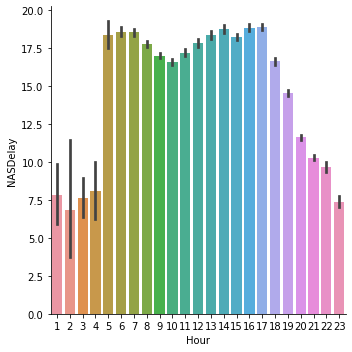

In [24]:
#Temps de retard moyen lié au système Américain (NASDelay) par heure

sns.catplot(x="Hour", y="NASDelay", data=df, kind="bar")
resultat3=df.loc[:, ['Hour','NASDelay']].groupby('Hour').mean()
resultat3.columns=['NASDelayMean']
#resultat3.to_csv('NASDelay.csv',index = True)
a= df['NASDelay'].value_counts()[0] #Nombre de zeros dans la colonne NASDelay
resultat3=resultat3.reset_index()
print(a)
resultat3

In [25]:
df_really_NASDelay=df[df['NASDelay']>0]

In [26]:
df_proba_hour_Nas= df_really_NASDelay.loc[:, ['Hour','NASDelay']].groupby(['Hour']).count()
df_proba_hour_Nas['NASDelay']=df_proba_hour_Nas['NASDelay']/df['NASDelay'].count()
df_proba_hour_Nas.columns=['proba_hour_Nas']
df_proba_hour_Nas=df_proba_hour_Nas.reset_index()
df_proba_hour_Nas

,Hour,proba_hour_Nas
0,1,0.000055
1,2,0.000039
2,3,0.000127
3,4,0.000078
4,5,0.001556
5,6,0.019432
6,7,0.027221
7,8,0.037311
8,9,0.038304
9,10,0.035492


In [27]:
resultat3=pd.merge(resultat3, df_proba_hour_Nas) 
resultat3

,Hour,NASDelayMean,proba_hour_Nas
0,1,7.846774,0.000055
1,2,6.830508,0.000039
2,3,7.650000,0.000127
3,4,8.075145,0.000078
4,5,18.367421,0.001556
5,6,18.590126,0.019432
6,7,18.551475,0.027221
7,8,17.752660,0.037311
8,9,17.019257,0.038304
9,10,16.592695,0.035492


In [28]:
resultat3['proba_NASDelay']=resultat3['NASDelayMean']*resultat3['proba_hour_Nas']
print(resultat3['proba_NASDelay'].max())
resultat3.to_csv('NASDelay_Proba.csv',index = True)
resultat3

0.9269848914408422


,Hour,NASDelayMean,proba_hour_Nas,proba_NASDelay
0,1,7.846774,0.000055,0.000431
1,2,6.830508,0.000039,0.000265
2,3,7.650000,0.000127,0.000972
3,4,8.075145,0.000078,0.000633
4,5,18.367421,0.001556,0.028574
5,6,18.590126,0.019432,0.361240
6,7,18.551475,0.027221,0.504989
7,8,17.752660,0.037311,0.662364
8,9,17.019257,0.038304,0.651910
9,10,16.592695,0.035492,0.588908
